# Coronavirus vs Meat Industry
## Project 1, Group 2
### Casey Burke, Charles Xia, Daniel Klein Velderman, Whelan Power

In [ ]:
from IPython.display import Image
Image("Images/wendys_headline.PNG")

Source: https://www.nytimes.com/2020/05/05/business/coronavirus-meat-shortages.html

In [2]:
Image("Images/cnbc_headline_grocery.PNG")

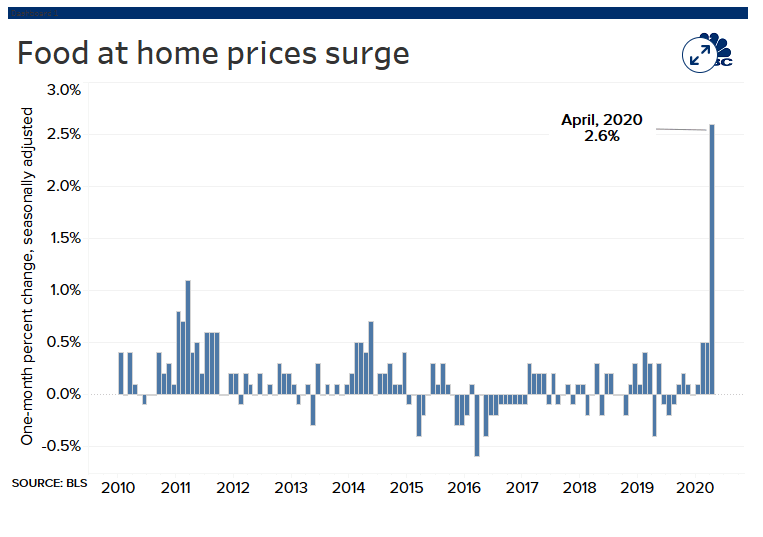

In [3]:
Image("Images/cnbc_headline_chart.PNG")

Source: https://www.cnbc.com/2020/05/12/us-grocery-costs-jump-the-most-in-46-years-led-by-rising-prices-for-meat-and-eggs.html

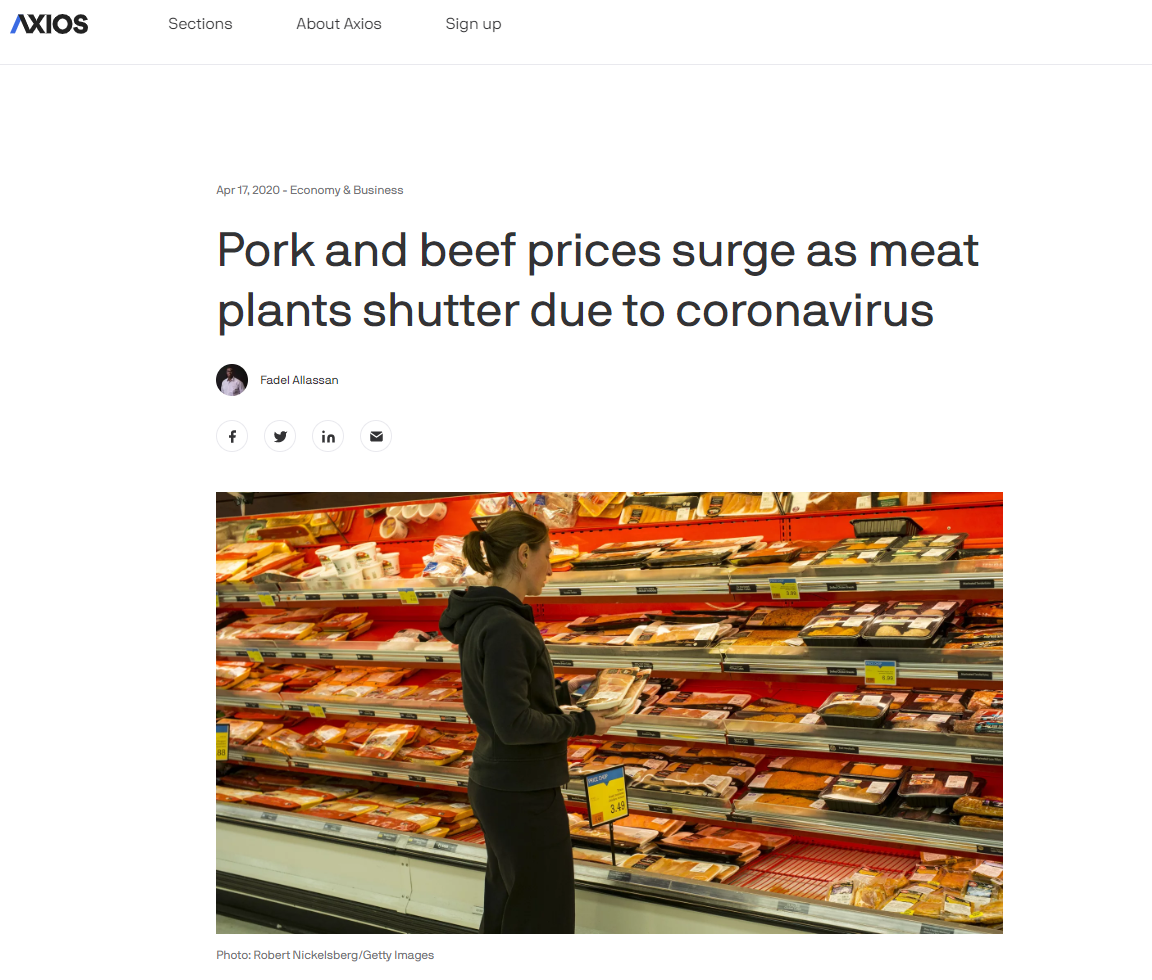

In [4]:
Image("Images/axios_porkandbeef.PNG")

Source: https://www.axios.com/coronavirus-pork-beef-prices-surge-meat-plants-52cdf848-3315-4077-90e5-90e1ccbddd39.html

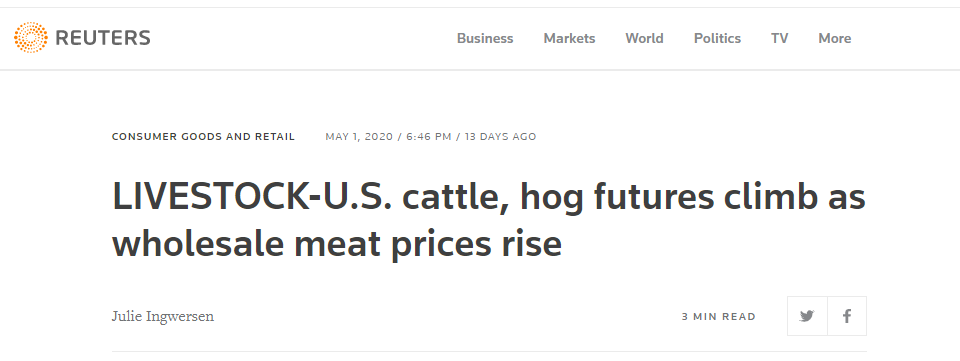

In [5]:
Image("Images/reuters_livestock.PNG")

Source:https://www.reuters.com/article/usa-livestock/livestock-us-cattle-hog-futures-climb-as-wholesale-meat-prices-rise-idUSL1N2CJ1VY

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import csv
from pathlib import Path
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
pn.extension('plotly')

In [42]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [6]:
%run Employment_data/employment_data.ipynb

In [7]:
%store -r product_price
%store -r hog_weights
%store -r hog_tops
%store -r swine_head_count

no stored variable or alias product_price
no stored variable or alias hog_weights
no stored variable or alias hog_tops
no stored variable or alias swine_head_count


In [37]:
%store -r total_country_df
%store -r last_day_df
%store -r dayone_cfm_date
%store -r last_day_confirmed_df
%store -r date_df
%store -r high_emplymt_states_data
%store -r food_manufacture_data
%store -r january_illness_df
%store -r emp_cvd_df

In [19]:
def product_price_movement():
    "Hog Cuts Price Movement"
    
    product_price_movement_panel = product_price.hvplot.line(
    label="Product Price for Hog Parts",
    height=400,
    width=500)
    
    return product_price_movement_panel

def hog_weights_flucuation():
    "Hog Weights Flucuation"
    
    hog_weights_flucuation_panel = hog_weights.hvplot.line(
    label="Hog Weights",
    height=400, width=500)
    
    return hog_weights_flucuation_panel

def hog_price_flucuation():
    "Hog Price Flucuation"
    
    hog_price_flucuation_panel = hog_tops.hvplot.line(
    label="Hog Carcass Price",
    height=400, 
    width=500)
    
    return hog_price_flucuation_panel

def swine_count_flucuation():
    "Swine Flucuation"
    
    swine_count_flucuation_panel = swine_head_count.hvplot.line(
    label="Slaughter Pig Count",
    height=400, 
    width=500)
    
    return swine_count_flucuation_panel

In [43]:
def illness_vs_covid():
    "Illnesses in the Meat Industry and Coronavirus Cases",
    combined_plot = january_illness_df.hvplot.line(
    label = "Ilnesses in the Meat Industry",
    ylabel = "# of Illnesses",
    rot=60,
    height=500,
    width=750
    ).opts(axiswise=True)+dayone_cfm_date.hvplot.line(
    label = "Confirmed Covid-19 Cases in the US",
    ylabel = "Confirmed Cases",
    rot=60,
    height=500,
    width=750
    ).opts(axiswise=True)
    return combined_plot

def illness_map():
    fig = px.scatter_mapbox(
    emp_cvd_df,
    lat="Latitude",
    lon="Longitude",
    hover_name="State",
    size="Confirmed",
    color="Confirmed",
    height = 1000,
    color_continuous_scale=px.colors.cyclical.Edge,
    zoom=4
    )
    return fig

In [28]:
employment_data_column = pn.Column("Amount of Employees", employment_data_thou)
employment_hours = pn.Column("Average Weekly Hours", employment_data_hours_avg)
product_price = pn.Column("Hog Cuts Price Movement", product_price_movement, hog_weights_flucuation, hog_price_flucuation, swine_count_flucuation)

NameError: name 'product_price' is not defined

In [47]:
employment_illness = pn.Column("Corona Virus Illnesses and Employment in the Meat Industry",illness_vs_covid)
illness_emp_map = pn.Column("Map of Employment and Corona Virus Illness", illness_map)

In [48]:
panel = pn.Tabs(
    ("Amount of Employees", employment_data_column),
    ("Weekly Hours", employment_hours), 
#     ("Meat Data", product_price) ,
    ("Illnesses vs CoronaVirus",employment_illness),
    ("Map",illness_emp_map)
)
panel

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive03435')
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive03506')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Layout, name='interactive06471')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive06691')